# **1. Perkenalan Dataset**


Dataset cuaca adalah kumpulan data berisi lebih dari 2500 data yang terdiri dari 6 fitur yaitu  Temperature, Humidity, Wind_Speed, Cloud_Cover, Pressure, dan Rain.

1. **Sumber Dataset**:  
   [Weather Forecast Dataset](https://www.kaggle.com/datasets/zeeshier/weather-forecast-dataset)
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Penjelasan Dataset**:  
   - Temperature (Suhu): Mengukur suhu udara di suatu lokasi dalam satuan derajat Celsius.
   - Humidity (Kelembapan): Menunjukkan jumlah uap air yang ada di udara, dinyatakan dalam persentase (%). Kelembapan yang tinggi berarti udara terasa lebih lembap dan bisa berpengaruh pada kenyamanan.
   - Wind Speed (Kecepatan Angin): Mengukur kecepatan angin di suatu lokasi dalam satuan km/jam.
   - Cloud Cover (Tutup Awan): Mengukur persentase langit yang tertutup awan. Semakin tinggi persentase, semakin banyak awan yang menutupi langit, yang dapat mengindikasikan kemungkinan hujan atau cuaca buruk.
   - Pressure (Tekanan Udara): Mengukur tekanan atmosfer di suatu lokasi dalam satuan hPa (hectopascal). Perubahan tekanan udara dapat menandakan perubahan cuaca, seperti datangnya badai atau cuaca cerah.
   - Rain (Hujan): Menilai indikasi hujan atau tdak dalam pengamatan yang sedang berlangsung.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_selection import SelectKBest, f_classif

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Memuat dataset
df = pd.read_csv("https://raw.githubusercontent.com/harisman7/submission-akhir-bmlp/refs/heads/main/weather_forecast_data.csv")

print(df.head())
print(df.info())

   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1    27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2    25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3    23.622080  74.367758    7.050551    67.255282   982.632013     rain
4    20.591370  96.858822    4.643921    47.676444   980.825142  no rain
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB
None


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Memahami struktur data
baris, kolom = df.shape  # Mendapatkan jumlah baris dan kolom
print(f"Jumlah baris dan kolom: {baris} baris dan {kolom} kolom")

# Menampilkan statistik deskriptif dari dataset
print("\nStatistik deskriptif dataset:")
print(df.describe)

Jumlah baris dan kolom: 2500 baris dan 6 kolom

Statistik deskriptif dataset:
<bound method NDFrame.describe of       Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0       23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1       27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2       25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3       23.622080  74.367758    7.050551    67.255282   982.632013     rain
4       20.591370  96.858822    4.643921    47.676444   980.825142  no rain
...           ...        ...         ...          ...          ...      ...
2495    21.791602  45.270902   11.807192    55.044682  1017.686181  no rain
2496    27.558479  46.481744   10.884915    39.715133  1008.590961  no rain
2497    28.108274  43.817178    2.897128    75.842952   999.119187  no rain
2498    14.789275  57.908105    2.374717     2.378743  1046.501875  no rain
2499    26.554356  97.101517   18.563084    81.35750

In [4]:
# Mengidentifikasi jumlah data kosong
print("\nData kosong:\n", df.isnull().sum())


Data kosong:
 Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64


In [5]:
# Menampilkan nilai pada atribut bertipe data kategorikal
for col in df.select_dtypes(exclude=['number']).columns:
    print(f'{col.upper()}'.center(50, ' '))
    print(df[col].value_counts(), end='\n\n')

                       RAIN                       
Rain
no rain    2186
rain        314
Name: count, dtype: int64



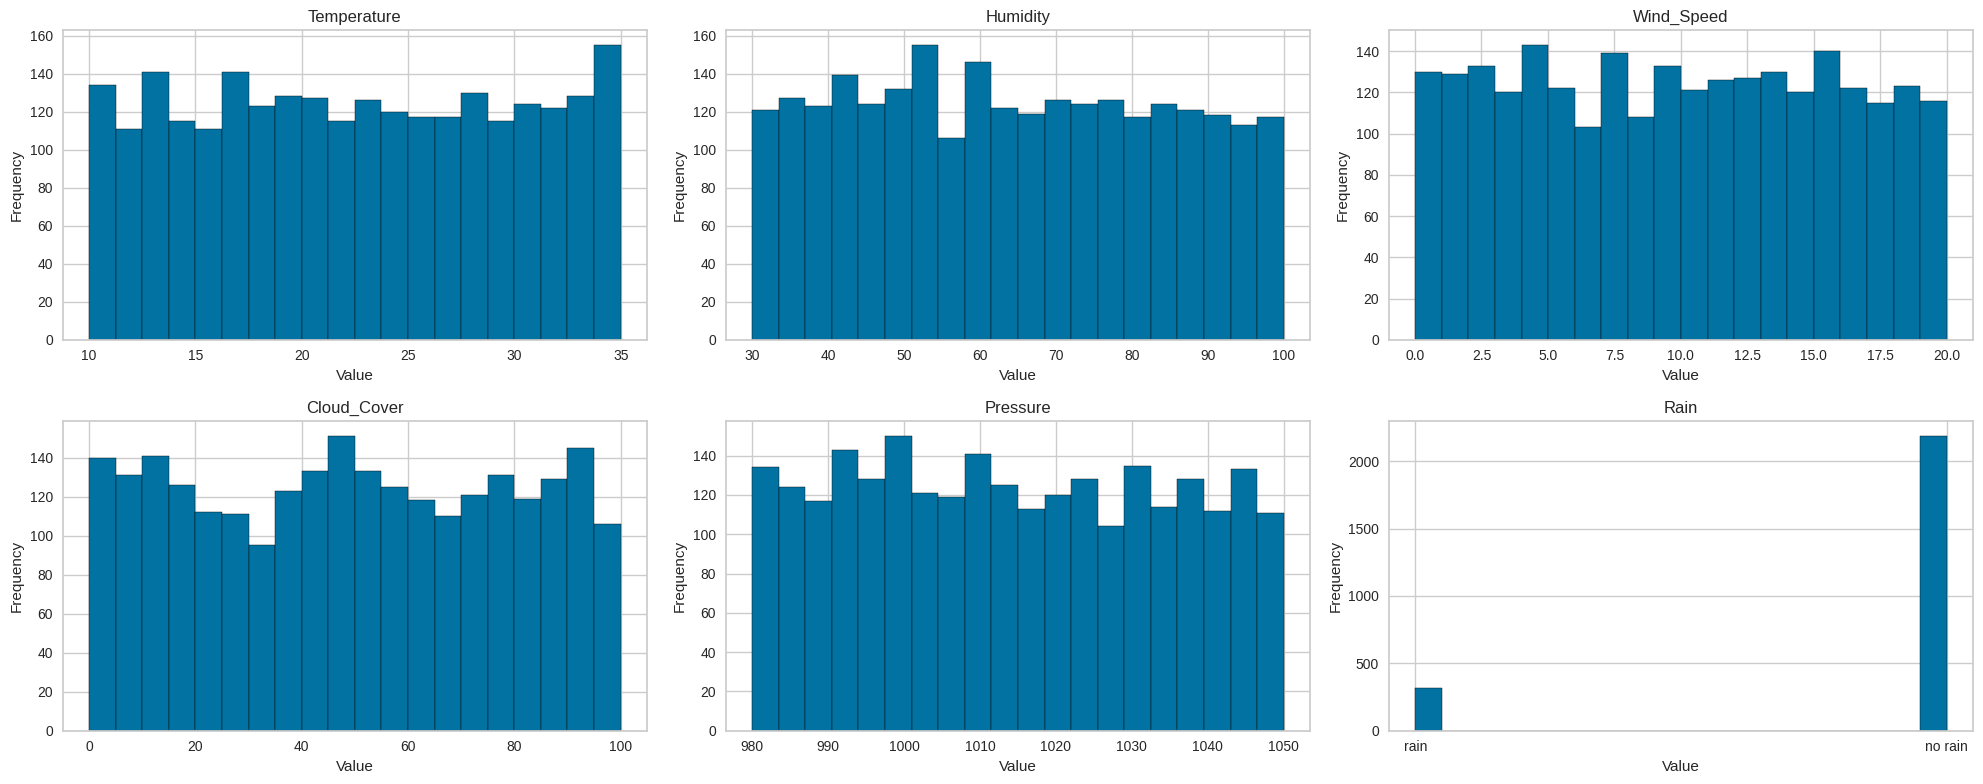

In [6]:
# Menghitung jumlah variabel
num_vars = len(df.columns)

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 3
n_rows = (num_vars + n_cols - 1) // n_cols  # Ceiling division

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Mengubah axes menjadi array 1D
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(df.columns):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak digunakan
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [7]:
# Melihat kolom bertipe data kategorikal
print(df.select_dtypes(include=['object']))

         Rain
0        rain
1     no rain
2     no rain
3        rain
4     no rain
...       ...
2495  no rain
2496  no rain
2497  no rain
2498  no rain
2499  no rain

[2500 rows x 1 columns]


In [8]:
# Mengubah nilai 'rain' menjadi 1 dan selainnya menjadi 0 pada kolom 'Rain'
df['Rain'] = (df['Rain'] == 'rain').astype(int)

# Menampilkan statistik deskriptif setelah perubahan
print(df.describe())

       Temperature     Humidity   Wind_Speed  Cloud_Cover     Pressure  \
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000   
mean     22.581725    64.347094     9.906255    49.658104  1014.312336   
std       7.326996    19.954739     5.780316    29.123104    20.196433   
min      10.001842    30.005071     0.009819     0.015038   980.014486   
25%      16.359398    47.339815     4.761909    23.900016   996.938630   
50%      22.536448    63.920797     9.908572    49.488284  1013.433035   
75%      28.976476    81.561021    14.948408    75.324140  1031.735067   
max      34.995214    99.997481    19.999132    99.997795  1049.985593   

              Rain  
count  2500.000000  
mean      0.125600  
std       0.331464  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


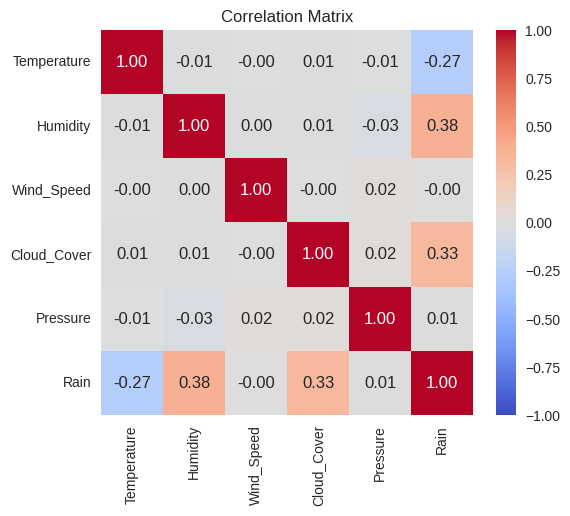

In [9]:
# Visualisasi korelasi antar variabel
plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

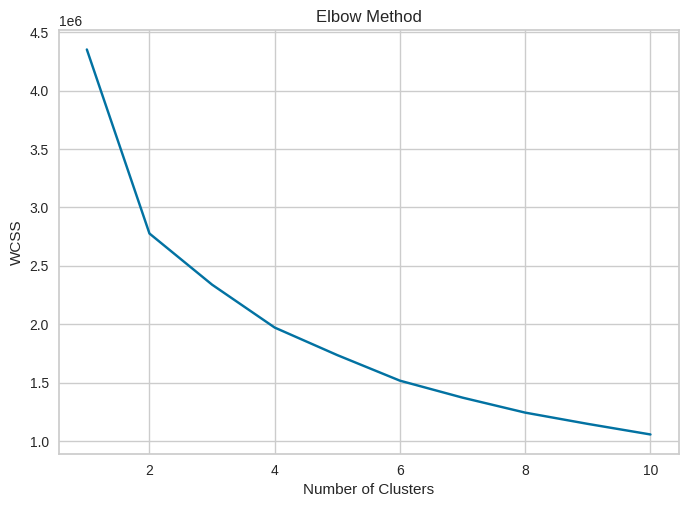

In [10]:
# Menentukan jumlah cluster optimal dengan metode Elbow
wcss = [KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(df).inertia_ for i in range(1, 11)]

# Visualisasi Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

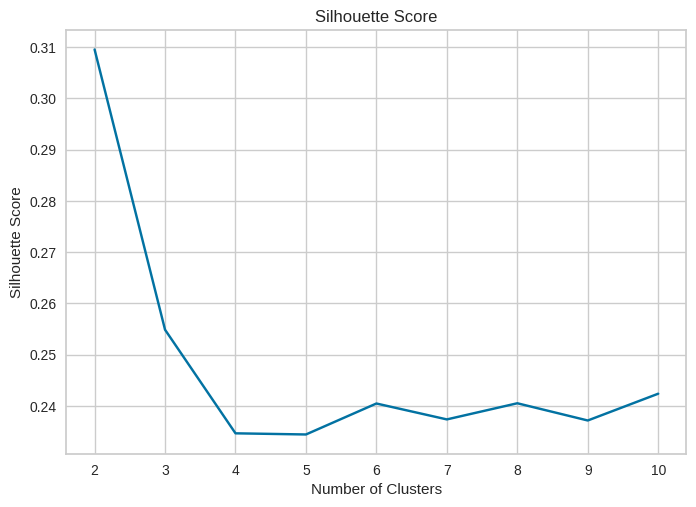

In [11]:
# Menggunakan Silhouette Score untuk mengevaluasi kualitas cluster
silhouette_scores = [silhouette_score(df, KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(df).labels_) for i in range(2, 11)]

# Visualisasi Silhouette Score
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [12]:
# Memilih jumlah cluster yang optimal dan menambahkan label cluster ke dalam dataset
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

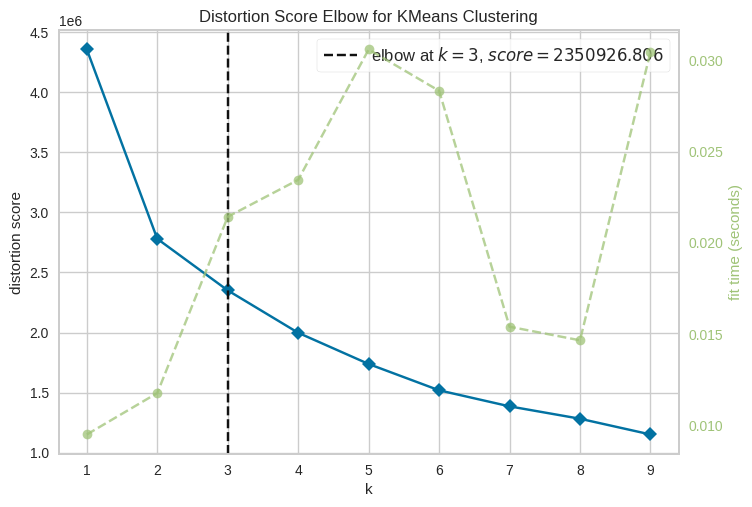

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Menggunakan visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit dan tampilkan grafik elbow
visualizer.fit(df)
visualizer.show()

In [14]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 5
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df)

# Menampilkan hasil model KMeans
kmeans

KMeans(n_clusters=4, random_state=0)

In [15]:
# Menghitung dan menampilkan Silhouette Score
silhouette_avg = silhouette_score(df, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.23530096558392943


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [16]:
# Mengambil label cluster dari KMeans
y = kmeans.labels_

# Pemilihan fitur menggunakan ANOVA F-value (untuk tugas seperti klasifikasi)
selector = SelectKBest(f_classif, k=2)  # Memilih 2 fitur teratas
X_new = selector.fit_transform(df, y)

# Menampilkan fitur terpilih
selected_features = df.columns[selector.get_support()]

print("Selected Features:", selected_features)

# Membuat DataFrame baru dengan fitur terpilih
df_selected = df[selected_features]

Selected Features: Index(['Cloud_Cover', 'Cluster'], dtype='object')


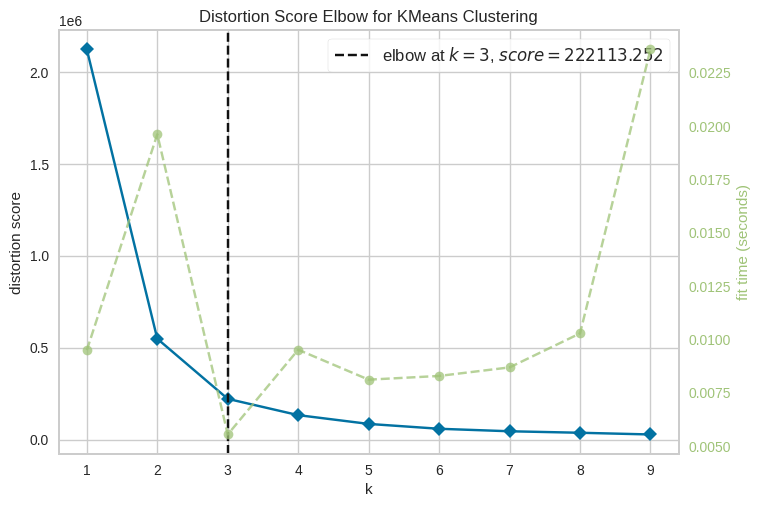

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Menggunakan visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit dan tampilkan grafik elbow
visualizer.fit(df_selected)
visualizer.show()

In [18]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 4
kmeans_selected = KMeans(n_clusters=4, random_state=0)
kmeans_selected.fit(df_selected)

# Menghitung dan menampilkan Silhouette Score setelah seleksi fitur
silhouette_avg_selected = silhouette_score(df_selected, kmeans_selected.labels_)
print(f"Silhouette Score (after feature selection): {silhouette_avg_selected}")

Silhouette Score (after feature selection): 0.5645326012945334


In [19]:
# Menyalin dataframe dan menambahkan kolom 'cluster' untuk label cluster
result_df = df.copy()
result_df['cluster'] = kmeans_selected.labels_

# Menampilkan dataframe dengan label cluster
result_df

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain,Cluster,cluster
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1,1,2
1,27.879734,46.489704,5.952484,4.990053,992.614190,0,3,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0,3,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,1,1,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,0,3,2
...,...,...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,0,2,1
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,0,3,2
2497,28.108274,43.817178,2.897128,75.842952,999.119187,0,2,1
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,0,0,0


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

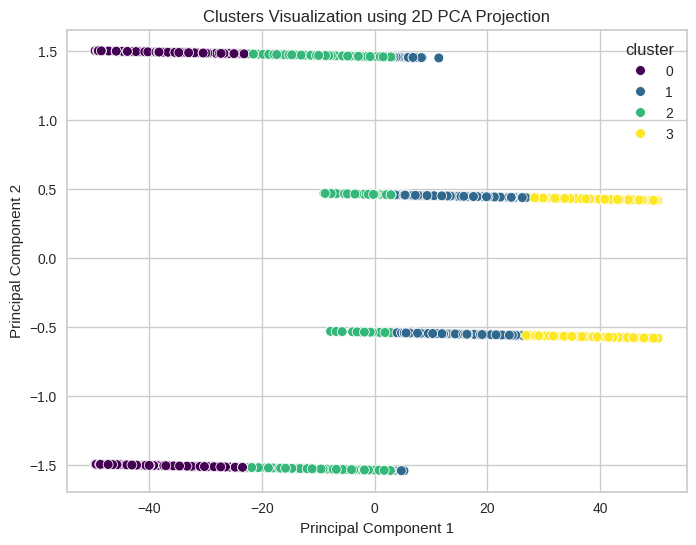

In [20]:
# Menggunakan PCA untuk reduksi dimensi ke 2 komponen utama
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_selected)

# Membuat DataFrame baru dengan hasil PCA dan menambahkan kolom cluster
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = kmeans_selected.labels_

# Visualisasi hasil clustering dalam ruang 2D setelah PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=50)
plt.title('Clusters Visualization using 2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [21]:
# Mengelompokkan data berdasarkan cluster dan menganalisis rata-rata fitur untuk setiap cluster
cluster_summary = df.groupby('Cluster').mean()

# Menampilkan ringkasan rata-rata fitur per cluster
print("Summary of Average Features per Cluster:")
print(cluster_summary)

Summary of Average Features per Cluster:
         Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure  \
Cluster                                                                 
0          22.530680  60.656859    9.889618    23.374288  1031.835135   
1          22.310567  83.024533   10.141114    76.156016  1016.442433   
2          22.688035  46.427055    9.836910    73.409617  1014.381197   
3          22.765032  68.975694    9.781652    26.984661   996.002251   

             Rain  
Cluster            
0        0.001637  
1        0.507719  
2        0.000000  
3        0.025954  


Tulis hasil interpretasinya di sini.
1. Cluster 0: Suhu rata-rata 22.53 derajat, kelembaban 60.66%, kecepatan angin 9.89, tutupan awan 23.37, tekanan 1031.84, dan hujan 0.001637. Cluster ini mewakili kondisi cuaca yang kering dan hangat dengan kecepatan angin yang rendah dan tutupan awan yang sedang. Cluster ini memiliki nilai tekanan tertinggi.
2. Cluster 1: Suhu rata-rata 22.31 derajat, kelembaban 83.02%, kecepatan angin 10.14, tutupan awan 76.16, tekanan 1016.44, dan hujan 0.507719. Cluster ini menunjukkan kelembaban tinggi dan suhu sedang dengan kecepatan angin dan tutupan awan tertinggi.
3. Cluster 2: Suhu rata-rata 22.69 derajat, kelembaban 46.43%, kecepatan angin 9.84, tutupan awan 73.41, tekanan 1014.38, dan hujan 0.000000. Cluster ini menunjukkan cuaca yang kering dan relatif hangat dengan kecepatan angin dan tutupan awan yang rendah.

4. Cluster 3: Suhu rata-rata 22.77 derajat, kelembaban 68.98%, kecepatan angin 9.78, tutupan awan 26.98, tekanan 996.00, dan hujan 0.025954. Cluster ini menunjukkan cuaca yang relatif hangat dan lembab dengan kecepatan angin dan tutupan awan yang sedang. Nilai tekanannya lebih rendah dibandingkan dengan cluster lainnya.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [22]:
result_df.to_csv('result_df.csv', index=False)